# Task 2 - Natural Language Processing

## Recurrent Neural Networks

### Rubén Barco Terrones - Aleix Casellas Comas - Andreu Masdeu Ninot - Pablo Lázaro Herrasti - Marco Remane

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('ner_dataset.csv', encoding='latin', error_bad_lines=False)

In [3]:
df.head(25)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [4]:
df.groupby('Tag').count()

,Sentence #,Word,POS
Tag,,,
B-art,18,402,402
B-eve,10,308,308
B-geo,3335,37644,37644
B-gpe,2989,15870,15870
B-nat,11,201,201
B-org,2752,20143,20143
B-per,4019,16990,16990
B-tim,515,20333,20333
I-art,0,297,297


In [5]:
words = df['Word'].unique()
dif_tags = df['Tag'].unique()

In [6]:
word2index = {word:i+1 for i, word in enumerate(words)}
tag2index = {tag:i for i, tag in enumerate(dif_tags)}
pos2index = {pos:i+1 for i, pos in enumerate(df['POS'].unique())}

In [7]:
tag2index

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

## Extract sentences from dataframe

In [8]:
sentences = []
tags = []
pos = []

sentence = [df.values[0][1]]
tag = [df.values[0][3]]
poss = [df.values[0][2]]

for row in df.values[1:]:
    
    if type(row[0]) != str:
        sentence.append(row[1])
        poss.append(row[2])
        tag.append(row[3])
    
    else:
        sentences.append(sentence)
        pos.append(poss)
        tags.append(tag)
        sentence = [row[1]]
        poss = [row[2]]
        tag = [row[3]]

In [9]:
sentences[1], pos[1], tags[1]

(['Families',
  'of',
  'soldiers',
  'killed',
  'in',
  'the',
  'conflict',
  'joined',
  'the',
  'protesters',
  'who',
  'carried',
  'banners',
  'with',
  'such',
  'slogans',
  'as',
  '"',
  'Bush',
  'Number',
  'One',
  'Terrorist',
  '"',
  'and',
  '"',
  'Stop',
  'the',
  'Bombings',
  '.',
  '"'],
 ['NNS',
  'IN',
  'NNS',
  'VBN',
  'IN',
  'DT',
  'NN',
  'VBD',
  'DT',
  'NNS',
  'WP',
  'VBD',
  'NNS',
  'IN',
  'JJ',
  'NNS',
  'IN',
  '``',
  'NNP',
  'NN',
  'CD',
  'NN',
  '``',
  'CC',
  '``',
  'VB',
  'DT',
  'NNS',
  '.',
  '``'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-per',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'])

In [10]:
X = [[word2index[word] for word in sentence] for sentence in sentences]
y = [[tag2index[tag] for tag in tag_] for tag_ in tags]
pos_tokens =  [[pos2index[posss] for posss in pos_] for pos_ in pos]

In [11]:
X[1], y[1], pos_tokens[1]

([23,
  2,
  24,
  25,
  12,
  10,
  26,
  27,
  10,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  36,
  14,
  36,
  41,
  10,
  42,
  22,
  36],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  2,
  1,
  4,
  2,
  8,
  9,
  13,
  8,
  1,
  14,
  13,
  1,
  2,
  11,
  1,
  2,
  15,
  5,
  9,
  16,
  9,
  15,
  10,
  15,
  7,
  8,
  1,
  12,
  15])

In [12]:
from keras.preprocessing.sequence import pad_sequences

In [13]:
max_len=max(len(s) for s in sentences)  
print(max_len)

104


In [14]:
X_final = pad_sequences(X, maxlen=max_len, padding='post')

In [15]:
y = pad_sequences(y, maxlen=max_len, padding='post')

In [16]:
pos_tokens = pad_sequences(pos_tokens, maxlen=max_len, padding='post')

In [17]:
def one_hot_encoding(pos, num_labels=17):
    array = np.zeros(num_labels)
    array[pos] = 1
    return array

In [18]:
y_final = np.array([np.array([one_hot_encoding(pos) for pos in list_tags])
           for list_tags in y])

In [19]:
word2index["PAD"] = 0
word2index["UNK"] = len(words)+1

In [20]:
pos2index["PAD"] = 0

In [21]:
index2tag = {v: k for k, v in tag2index.items()}
index2word = {v: k for k, v in word2index.items()}
index2pos = {v: k for k, v in pos2index.items()}

## Model 1

In [93]:
from keras.layers import Bidirectional, LSTM, Embedding, TimeDistributed, Dense, concatenate
from keras.callbacks import EarlyStopping
def build_model():
    model = keras.models.Sequential()
    
    model.add(Embedding(input_dim=len(words)+2, output_dim=128, input_length=104))
    model.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))
    model.add(TimeDistributed(Dense(len(tag2index), activation="softmax")))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [23]:
model = build_model()

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 104, 128)          4503040   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 104, 200)          183200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 104, 17)           3417      
Total params: 4,689,657
Trainable params: 4,689,657
Non-trainable params: 0
_________________________________________________________________


In [56]:
X_train = X_final[0:35970]
X_test  = X_final[35970:]

y_train = y_final[0:35970]
y_test  = y_final[35970:]

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])


Train on 35970 samples, validate on 11988 samples
Epoch 1/10
35970/35970 [==============================] - 463s 13ms/step - loss: 0.0929 - acc: 0.9809 - val_loss: 0.0298 - val_acc: 0.9913
Epoch 2/10
35970/35970 [==============================] - 460s 13ms/step - loss: 0.0229 - acc: 0.9932 - val_loss: 0.0244 - val_acc: 0.9925
Epoch 3/10
35970/35970 [==============================] - 469s 13ms/step - loss: 0.0166 - acc: 0.9948 - val_loss: 0.0237 - val_acc: 0.9929
Epoch 4/10
35970/35970 [==============================] - 470s 13ms/step - loss: 0.0134 - acc: 0.9957 - val_loss: 0.0254 - val_acc: 0.9927
Epoch 5/10
35970/35970 [==============================] - 461s 13ms/step - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0255 - val_acc: 0.9928
Epoch 00005: early stopping


In [29]:
model.save("normalmodel.h5")

In [30]:
def plot_history(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    


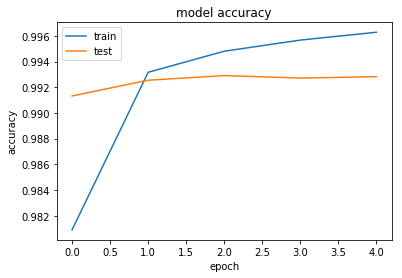

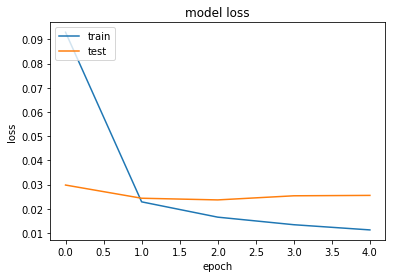

In [31]:
plot_history(history)

In [32]:
def show_predictions(x, y_true):
    preds = model.predict(x.reshape(1,-1))
    print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
    for i in range(len(x)):
        if index2word[x[i]] == "PAD": break
        print("{:15}: {:5} {}".format(index2word[int(x[i])], index2tag[int(preds[0][i].argmax())], index2tag[y_true[i].argmax()]))

You can execute the following cell to see predictions of the model

In [35]:
import random
a = random.randint(0, 45000)
show_predictions(X_final[a], y_final[a])

Word           ||True ||Pred
In             : O     O
its            : O     O
annual         : O     O
report         : O     O
on             : O     O
proliferation  : O     O
threats        : O     O
released       : O     O
to             : O     O
lawmakers      : O     O
Tuesday        : B-tim B-tim
,              : O     O
the            : O     O
CIA            : B-org B-org
said           : O     O
al-Qaida       : B-org B-org
's             : O     O
stated         : O     O
desire         : O     O
to             : O     O
carry          : O     O
out            : O     O
attacks        : O     O
using          : O     O
chemical       : O     O
,              : O     O
biological     : O     O
or             : O     O
nuclear        : O     O
materials      : O     O
is             : O     O
one            : O     O
of             : O     O
the            : O     O
agency         : O     O
's             : O     O
highest        : O     O
concerns       : O     O
.        

In [36]:
from sklearn.metrics import accuracy_score

Let's create function to compute the number of correct sentences (fully correct) over the total

In [37]:
def check_total_sentences(xtrue, ytrue, model):
    preds = model.predict(xtrue).argmax(axis=2)
    err = 0
    for i, pred in enumerate(preds):
        
        if (pred  == ytrue[i].argmax(axis=1)).all():
            pass
        
        else:
            err += 1
            
    print("Total acc is: ", (len(ytrue)-err)/len(ytrue))

In [38]:
check_total_sentences(X_test, y_test, model)

Total acc is:  0.6133633633633634


In [322]:
check_total_sentences(X_train, y_train, model)

Total acc is:  0.8191826522101752


#### F1 score and confusion matrix

Train

In [282]:
preds = model.predict(X_train).argmax(axis=2)

In [286]:
conf_matrix = np.zeros((17,17))
ground_truth = y_train.argmax(axis=2)

In [287]:
for i in range(len(preds)):
    for j in range(len(preds[0])):
        conf_matrix[preds[i][j]][ground_truth[i][j]] += 1

In [288]:
labels = list(tag2index.keys())

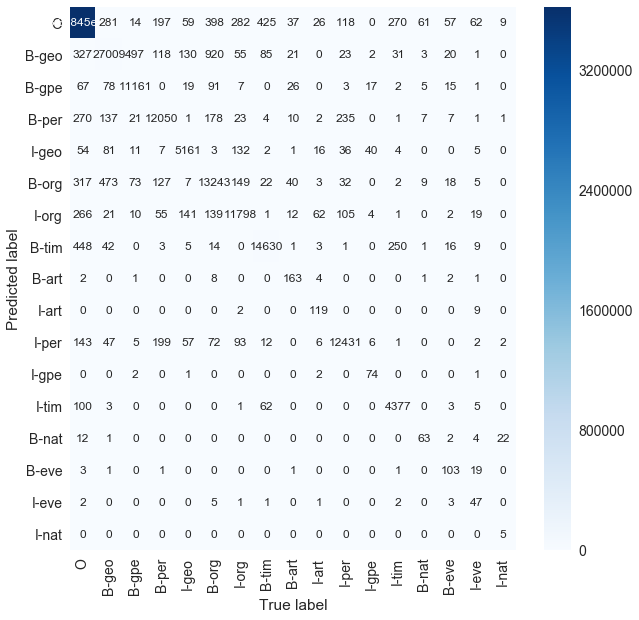

In [289]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='g',annot_kws={"size": 12})# font size
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confmat.png")
plt.show()

In [290]:
def recall_fun(conf_mat):
    
    recall_list=[]
    size_mat = len(conf_mat)
    
    for i in range(0,size_mat):
        true_positive = 0
        false_negative = 0
        for j in range(0,size_mat):
            if(i==j): true_positive = conf_mat[i,j]
            else: false_negative += conf_mat[i,j]
        if true_positive+false_negative == 0: recall_k = 0
        else:
            recall_k = true_positive/(true_positive+false_negative)
        recall_list.append(recall_k)
        
    return recall_list

def precision_fun(conf_mat):
    
    precision_list=[]
    size_mat = len(conf_mat)
    
    for j in range(0,size_mat):
        true_positive = 0
        false_positive = 0
        for i in range(0,size_mat):
            if(i==j): true_positive = conf_mat[i,j]
            else: false_positive += conf_mat[i,j]
                
        if true_positive+false_positive == 0: precision_k = 0
        else:
            precision_k = true_positive/(true_positive+false_positive)
        precision_list.append(precision_k)
        
    return precision_list

def F1_score(conf_mat, mode = 1):
    recall = recall_fun(conf_mat)
    precision = precision_fun(conf_mat)
    
    size_mat = len(conf_mat)
    F1 = 0
    f1 = []
    
    for i in range(0,size_mat):
        if precision[i]+recall[i] == 0: f1_k = 0
            
        else: 
            f1_k = (2*precision[i]*recall[i]) / (precision[i]+recall[i])
            F1 += f1_k
        if mode: 
            print('F1 score for {} is {} '.format(labels[i], f1_k ))
            print('')
            print('Precision: {}, Recall: {} '.format(precision[i], recall[i]))
            print('')
        f1.append([f1_k, precision[i], recall[i]])
        
    print('Mean F1 score is {}'.format(F1/size_mat))  
    return F1/size_mat, f1

In [291]:
avg, f1 = F1_score(conf_matrix, 0)

Mean F1 score is 0.766304281988409


In [292]:
pd.DataFrame(f1, columns = ["F1", "Precision", "Recall"], index=labels)

,F1,Precision,Recall
O,0.999405,0.999445,0.999366
B-geo,0.940818,0.958650,0.923637
B-gpe,0.958561,0.946248,0.971197
B-per,0.937561,0.944579,0.930646
I-geo,0.927070,0.924745,0.929408
B-org,0.895069,0.878707,0.912052
I-org,0.937130,0.940604,0.933682
B-tim,0.954120,0.959722,0.948583
B-art,0.659919,0.522436,0.895604
I-art,0.636364,0.487705,0.915385


Test

In [219]:
preds = model.predict(X_test).argmax(axis=2)

In [220]:
conf_matrix = np.zeros((17,17))
ground_truth = y_test.argmax(axis=2)

In [263]:
for i in range(len(preds)):
    for j in range(len(preds[0])):
        conf_matrix[preds[i][j]][ground_truth[i][j]] += 1

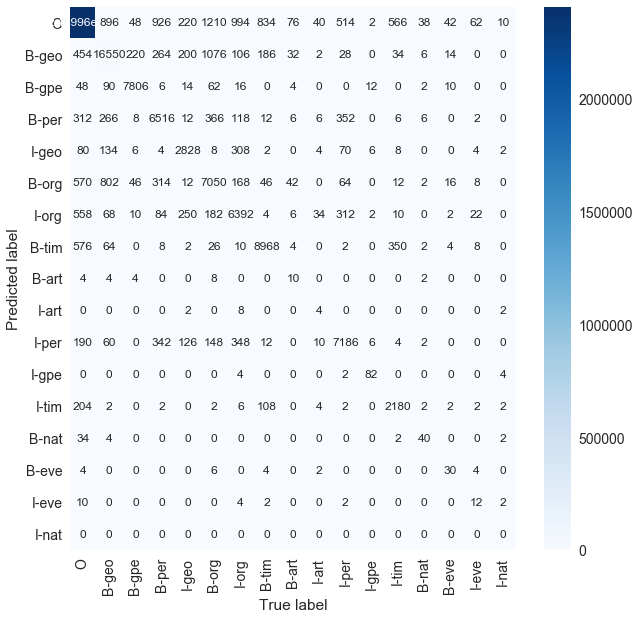

In [265]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='g',annot_kws={"size": 12})# font size
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confmat.png")
plt.show()

In [267]:
avg, f1 = F1_score(conf_matrix, 0)

Mean F1 score is 0.6081346205463628


In [268]:
pd.DataFrame(f1, columns = ["F1", "Precision", "Recall"], index=labels)

,F1,Precision,Recall
O,0.998028,0.998739,0.997319
B-geo,0.868493,0.873812,0.863238
B-gpe,0.962634,0.958027,0.967286
B-per,0.792026,0.769667,0.815724
I-geo,0.793268,0.771413,0.816397
B-org,0.730721,0.694992,0.770323
I-org,0.778658,0.753596,0.805444
B-tim,0.887833,0.881116,0.894653
B-art,0.094340,0.055556,0.312500
I-art,0.065574,0.037736,0.250000


## Use each char
## Model 2
In this model, we are going to use each word of the sentence together with each char of every word. We need to define a few new things before implementing the model

In [40]:
chars = set([w_i for w in words for w_i in w])
char2index = {c: i + 1 for i, c in enumerate(chars)}
idx2char = {i: w for w, i in char2index.items()}

In [41]:
char2index["PAD"] = 0
char2index["UNK"] = len(chars)+1

We set manually the number of characters we want to take into account from every word to 15

In [42]:
max_len_char = 15

In [43]:
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2index.get(sentence[i][0][j]))
            except:
                word_seq.append(char2index.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

X_char has 47959 elements. Each of them is a matrix of size 75x15, where 75 is the lenght that we have chosen for the sentence, and 15 the lenght we have chosen for each word. If the word is longer, we just take the first 15 chars

In [112]:
X_word_train = X_final[0:35970]
X_word_test  = X_final[35970:]
X_char_train = X_char[0:35970]
X_char_test = X_char[35970:]
y_char_train = y[0:35970]
y_char_test  = y[35970:]

In [105]:
def build_model_char():
    input_word = keras.layers.Input(shape=(max_len,))
    input_char = keras.layers.Input(shape=(max_len, max_len_char,))
    
    emb_word = Embedding(input_dim=len(words) + 2, output_dim=20, input_length=max_len)(input_word)
    emb_char = TimeDistributed(Embedding(input_dim=len(chars) + 2, output_dim=10, input_length=max_len_char))(input_char)

    char_enc = TimeDistributed(LSTM(units=20, return_sequences=False, recurrent_dropout=0.2))(emb_char)

    x = keras.layers.concatenate([emb_word, char_enc])
    main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,recurrent_dropout=0.2))(x)
    out = TimeDistributed(Dense(len(dif_tags) + 1, activation="softmax"))(main_lstm)

    model = keras.models.Model([input_word, input_char], out)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ['accuracy'])

    return model

In [106]:
model2 = build_model_char()

In [158]:
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 104, 15)      0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
time_distributed_20 (TimeDistri (None, 104, 15, 10)  1000        input_16[0][0]                   
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 104, 20)      703600      input_15[0][0]                   
____________________________________________________________________________________________

In [108]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)
history2 = model2.fit([X_word_train, np.array(X_char_train).reshape((len(X_char_train), max_len, max_len_char))],
                    np.array(y_char_train).reshape(len(y_char_train), max_len, 1), batch_size=32, epochs=10, 
                     validation_data=([X_word_test, np.array(X_char_test).reshape((len(X_char_test), max_len, max_len_char))],
                    np.array(y_char_test).reshape(len(y_char_test), max_len, 1)), verbose=1, callbacks=[es])

Train on 35970 samples, validate on 11988 samples
Epoch 1/10
35970/35970 [==============================] - 325s 9ms/step - loss: 0.1447 - acc: 0.9734 - val_loss: 0.0496 - val_acc: 0.9860
Epoch 2/10
35970/35970 [==============================] - 327s 9ms/step - loss: 0.0355 - acc: 0.9901 - val_loss: 0.0280 - val_acc: 0.9918
Epoch 3/10
35970/35970 [==============================] - 279s 8ms/step - loss: 0.0234 - acc: 0.9931 - val_loss: 0.0241 - val_acc: 0.9927
Epoch 4/10
35970/35970 [==============================] - 274s 8ms/step - loss: 0.0189 - acc: 0.9943 - val_loss: 0.0229 - val_acc: 0.9930
Epoch 5/10
35970/35970 [==============================] - 276s 8ms/step - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0227 - val_acc: 0.9932
Epoch 6/10
35970/35970 [==============================] - 326s 9ms/step - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0229 - val_acc: 0.9932
Epoch 7/10
35970/35970 [==============================] - 337s 9ms/step - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0237 - 

In [109]:
model2.save('wordchar.h5')

In [124]:
y_test[0][5].argmax()

10

In [125]:
y_char_test[0][5]

10

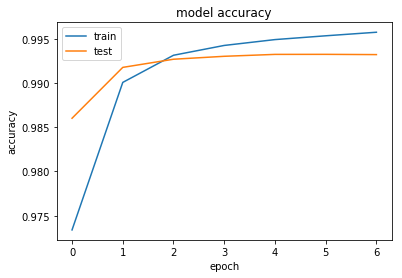

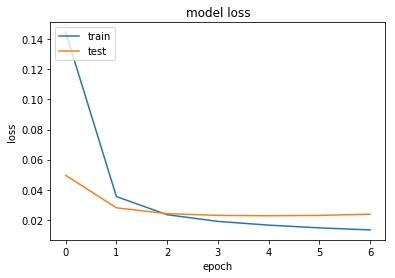

In [127]:
plot_history(history2)

In [135]:
def show_predictions2(x, y_true):
    print('arribo aqui')
    preds = model2.predict(x)
    print('aqui tambie')
    print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
    for i in range(len(x[0][0])):
        if index2word[x[0][0][i]] == "PAD": break
        print("{:15}: {:5} {}".format(index2word[int(x[0][0][i])], index2tag[int(preds[0][i].argmax())], index2tag[y_true[i]]))

In [173]:
import random
a = random.randint(0, 10000)
show_predictions2([X_word_test[a].reshape(1,-1), np.array(X_char_test[a]).reshape((1,max_len, max_len_char))], y_char_test[a])

arribo aqui
aqui tambie
Word           ||True ||Pred
The            : O     O
Davis          : B-per B-per
Cup            : I-per I-per
final          : O     O
is             : O     O
set            : O     O
for            : O     O
December       : B-tim B-tim
03-May         : I-tim I-tim
.              : O     O


In [177]:
def check_total_sentences2(xtrue, ytrue, model):
    preds = model.predict(xtrue).argmax(axis=2)
    err = 0
    for i, pred in enumerate(preds):
        
        if (pred  == ytrue[i]).all():
            pass
        
        else:
            err += 1
            
    print("Total acc is: ", (len(ytrue)-err)/len(ytrue))

In [178]:
check_total_sentences2([X_word_test, np.array(X_char_test).reshape(len(X_char_test),max_len,max_len_char)], y_char_test, model2)

Total acc is:  0.6180347013680347


In [321]:
check_total_sentences2([X_word_train, np.array(X_char_train).reshape(len(X_char_train),max_len,max_len_char)], y_char_train, model2)

Total acc is:  0.7694745621351126


#### F1 score and Confusion matrix

Train

In [293]:
preds = model2.predict([X_word_train, np.array(X_char_train).reshape(len(X_char_train),max_len,max_len_char)]).argmax(axis=2)

In [294]:
conf_matrix = np.zeros((17,17))
ground_truth = y_char_train

In [295]:
for i in range(len(preds)):
    for j in range(len(preds[0])):
        conf_matrix[preds[i][j]][ground_truth[i][j]] += 1

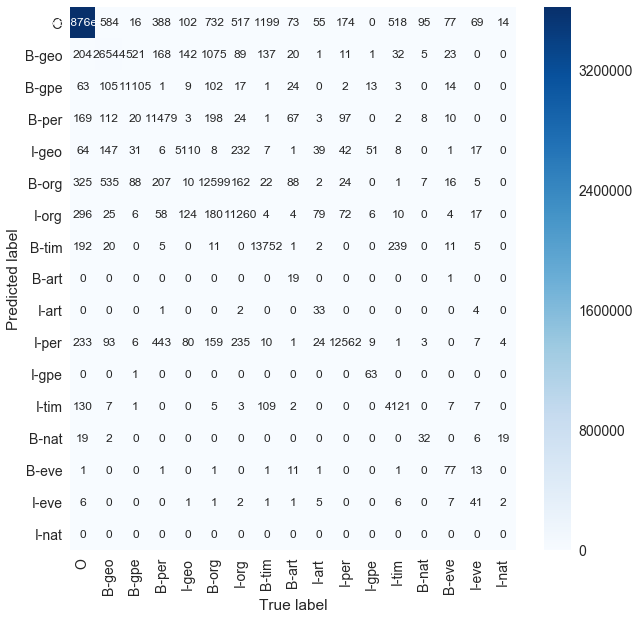

In [296]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='g',annot_kws={"size": 12})# font size
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confmat2.png")
plt.show()

In [299]:
avg, f1 = F1_score(conf_matrix, 0)

Mean F1 score is 0.6595652602018841


In [298]:
pd.DataFrame(f1, columns = ["F1", "Precision", "Recall"], index=labels)

,F1,Precision,Recall
O,0.999128,0.999530,0.998727
B-geo,0.928973,0.942145,0.916163
B-gpe,0.955104,0.941501,0.969107
B-per,0.920160,0.899820,0.941442
I-geo,0.900837,0.915607,0.886537
B-org,0.864070,0.835976,0.894117
I-org,0.912184,0.897712,0.927131
B-tim,0.932908,0.902125,0.965866
B-art,0.114458,0.060897,0.950000
I-art,0.232394,0.135246,0.825000


Test

In [269]:
preds = model2.predict([X_word_test, np.array(X_char_test).reshape(len(X_char_test),max_len,max_len_char)]).argmax(axis=2)

In [270]:
conf_matrix = np.zeros((17,17))
ground_truth = y_char_test

In [271]:
for i in range(len(preds)):
    for j in range(len(preds[0])):
        conf_matrix[preds[i][j]][ground_truth[i][j]] += 1

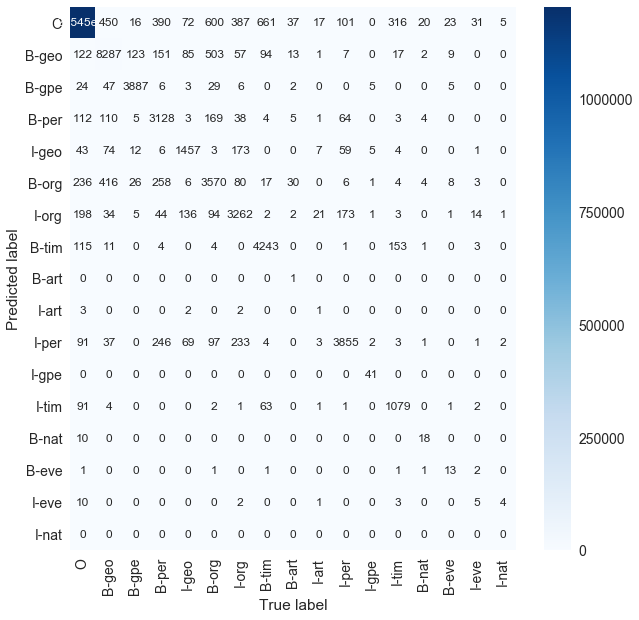

In [272]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='g',annot_kws={"size": 12})# font size
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confmat2.png")
plt.show()

In [274]:
avg, f1 = F1_score(conf_matrix, 0)

Mean F1 score is 0.6035650553539825


In [275]:
pd.DataFrame(f1, columns = ["F1", "Precision", "Recall"], index=labels)

,F1,Precision,Recall
O,0.998268,0.999125,0.997413
B-geo,0.875033,0.875079,0.874987
B-gpe,0.961177,0.954099,0.968361
B-per,0.794009,0.738956,0.857926
I-geo,0.792494,0.794872,0.790130
B-org,0.733285,0.703864,0.765273
I-org,0.792517,0.769158,0.817339
B-tim,0.881754,0.833759,0.935612
B-art,0.021978,0.011111,1.000000
I-art,0.032787,0.018868,0.125000


## Use POS

## Model3

In [51]:
def build_model_pos2():
    input_text = keras.layers.Input(shape=(104,))
    input_pos = keras.layers.Input(shape=(104,))
    
    emb_text = Embedding(input_dim=len(words)+2, output_dim=128, input_length=104)(input_text)
    emb_pos = Embedding(input_dim=len(pos2index), output_dim=128, input_length=104)(input_pos)
    
    
    rec_out = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(emb_text)
    rec_out2 = Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1))(emb_pos)
    
    merged = keras.layers.Concatenate()([rec_out, rec_out2])
    
    out = TimeDistributed(Dense(len(tag2index), activation="softmax"))(merged)
    
    model = keras.models.Model(inputs = [input_text, input_pos], outputs = out)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [52]:
model3 = build_model_pos2()

In [53]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 104)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 104)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 104, 128)     4503040     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 104, 128)     5504        input_4[0][0]                    
____________________________________________________________________________________________

In [57]:
X_train_opos = pos_tokens[0:35970]
X_test_opos  = pos_tokens[35970:]

In [59]:
history3 = model3.fit([X_train, X_train_opos], y_train, batch_size=32, epochs=8,
                    validation_data=([X_test, X_test_opos], y_test), verbose=1, callbacks=[es])

Train on 35970 samples, validate on 11988 samples
Epoch 1/8
35970/35970 [==============================] - 813s 23ms/step - loss: 0.0538 - acc: 0.9861 - val_loss: 0.0249 - val_acc: 0.9926
Epoch 2/8
35970/35970 [==============================] - 817s 23ms/step - loss: 0.0203 - acc: 0.9940 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 3/8
35970/35970 [==============================] - 772s 21ms/step - loss: 0.0151 - acc: 0.9953 - val_loss: 0.0207 - val_acc: 0.9937
Epoch 4/8
35970/35970 [==============================] - 803s 22ms/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0215 - val_acc: 0.9936
Epoch 5/8
35970/35970 [==============================] - 840s 23ms/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0229 - val_acc: 0.9935
Epoch 00005: early stopping


In [61]:
model3.save("postextgood.h5")

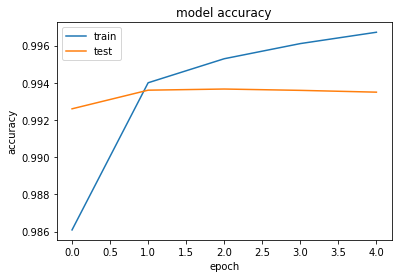

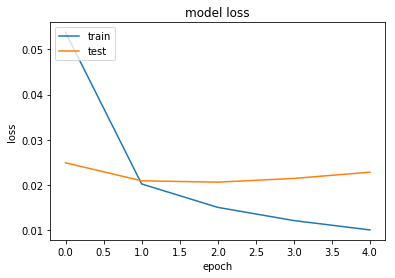

In [62]:
plot_history(history3)

In [73]:
def show_predictions3(x, y_true):
    preds = model3.predict(x)
    print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
    for i in range(len(x[0][0])):
        if index2word[x[0][0][i]] == "PAD": break
        print("{:15}: {:5} {}".format(index2word[int(x[0][0][i])], index2tag[int(preds[0][i].argmax())], index2tag[y_true[i].argmax()]))

In [319]:
import random
a = random.randint(0, 10000)
show_predictions3([X_test[a].reshape(1,-1), X_test_opos[a].reshape(1,-1)], y_test[a])

Word           ||True ||Pred
British        : B-org B-org
Airways        : I-org I-org
canceled       : O     O
just           : O     O
19             : O     O
flights        : O     O
from           : O     O
London         : B-geo B-geo
's             : O     O
Heathrow       : B-geo B-geo
Airport        : I-geo I-geo
Thursday       : B-tim B-tim
.              : O     O


In [80]:
check_total_sentences([X_test, X_test_opos], y_test, model3)

Total acc is:  0.6380547213880547


In [320]:
check_total_sentences([X_train, X_train_opos], y_train, model3)

Total acc is:  0.8298860161245483


#### F1 score and Confusion matrix

Train

In [300]:
preds = model3.predict([X_train, X_train_opos]).argmax(axis=2)

In [301]:
conf_matrix = np.zeros((17,17))

In [304]:
ground_truth = y_train.argmax(axis=2)

In [305]:
for i in range(len(preds)):
    for j in range(len(preds[0])):
        conf_matrix[preds[i][j]][ground_truth[i][j]] += 1

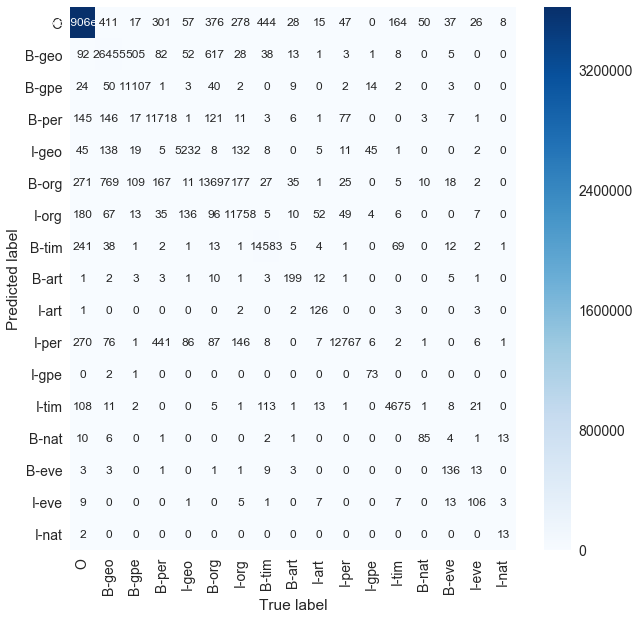

In [306]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='g',annot_kws={"size": 12})# font size
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confmat3.png")
plt.show()

In [307]:
avg, f1 = F1_score(conf_matrix, 0)

Mean F1 score is 0.8174800489171348


In [308]:
pd.DataFrame(f1, columns = ["F1", "Precision", "Recall"], index=labels)

,F1,Precision,Recall
O,0.999494,0.999613,0.999376
B-geo,0.943575,0.938986,0.948208
B-gpe,0.963647,0.941670,0.986675
B-per,0.936915,0.918555,0.956025
I-geo,0.931624,0.937466,0.925854
B-org,0.901267,0.908832,0.893827
I-org,0.942110,0.937415,0.946851
B-tim,0.965186,0.956639,0.973888
B-art,0.718412,0.637821,0.822314
I-art,0.661417,0.516393,0.919708


Test

In [276]:
preds = model3.predict([X_test, X_test_opos]).argmax(axis=2)

In [277]:
conf_matrix = np.zeros((17,17))

In [244]:
ground_truth = y_test.argmax(axis=2)

In [278]:
for i in range(len(preds)):
    for j in range(len(preds[0])):
        conf_matrix[preds[i][j]][ground_truth[i][j]] += 1

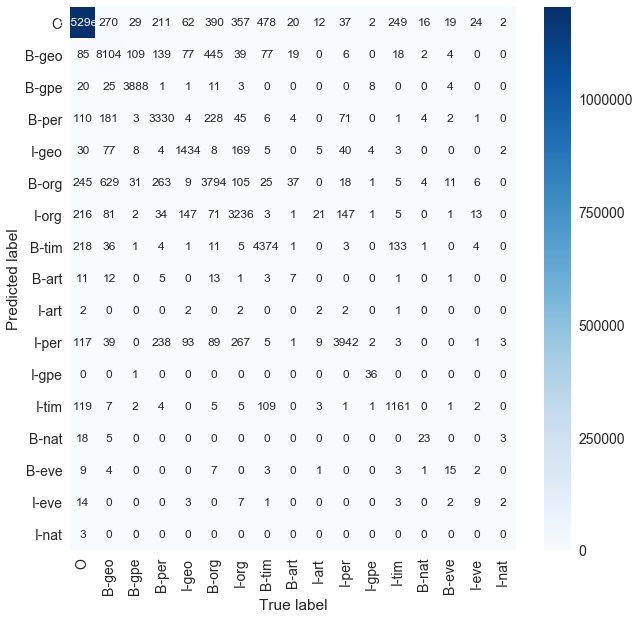

In [279]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='g',annot_kws={"size": 12})# font size
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confmat3.png")
plt.show()

In [280]:
avg, f1 = F1_score(conf_matrix, 0)

Mean F1 score is 0.6091957127804903


In [281]:
pd.DataFrame(f1, columns = ["F1", "Precision", "Recall"], index=labels)

,F1,Precision,Recall
O,0.998594,0.998991,0.998196
B-geo,0.871679,0.855755,0.888207
B-gpe,0.967766,0.954345,0.981570
B-per,0.809923,0.786676,0.834586
I-geo,0.791828,0.782324,0.801565
B-org,0.739932,0.748028,0.732008
I-org,0.787348,0.763028,0.813270
B-tim,0.885335,0.859501,0.912771
B-art,0.097222,0.077778,0.129630
I-art,0.062500,0.037736,0.181818


## Unknown text predictions

In [183]:
def make_prediction_text(st, pos=None, model_chosen=None):
    st = st.split()
    tokens = []
    if pos is not None:
        pos = [pos2index[x] for x in pos]
    
    for elem in st:
        
        try:
            tokens.append(word2index[elem])
            
        except KeyError:
            
            tokens.append(len(words)+1)
    
    #pad 0 until full lenght
    
    for i in range(104-len(tokens)):
        tokens.append(0)
        if pos is not None:
            pos.append(0)
            
    if pos is None:
        
        preds = model.predict(np.array(tokens).reshape(1,-1))
    elif pos is not None and model_chosen == 2:
        preds = model2.predict(np.stack((np.array(tokens), np.array(pos)), axis=1).reshape(1, 104, 2))
    
    elif pos is not None and model_chosen == 3:
        preds = model3.predict([np.array(tokens).reshape(1,-1), np.array(pos).reshape(1,-1)])
    print("{:15}||{}".format("Word", "Prediction"))
    for i in range(len(tokens)):
        if index2word[tokens[i]] == "PAD": break
        print("{:15}: {:5}".format(st[i], index2tag[int(preds[0][i].argmax())]))
            

## Model 1

In [184]:
st1 = "The programmers from Barcelona might write a sentence without a spell checker ."
st2 = "The programmers from Barchelona cannot write a sentence without a spell checker ."
st3 = "Jack London went to Parris ."
st4 = "Jack London went to Paris ."
st5 = "We never though Microsoft would become such a big company ."
st6 = "We never though Microsof would become such a big company ."
st7 = "The president of U.S.A though they could win the war"
st8 = "The president of the United States of America though they could win the war"
st9 = "The king of Saudi Arabia wanted total control ."
st10 = "Robin does not want to go to Saudi Arabia ."

In [185]:
make_prediction_text(st1)

Word           ||Prediction
The            : O    
programmers    : O    
from           : O    
Barcelona      : O    
might          : O    
write          : O    
a              : O    
sentence       : O    
without        : O    
a              : O    
spell          : O    
checker        : O    
.              : O    


In [186]:
make_prediction_text(st2)

Word           ||Prediction
The            : O    
programmers    : O    
from           : O    
Barchelona     : O    
cannot         : O    
write          : O    
a              : O    
sentence       : O    
without        : O    
a              : O    
spell          : O    
checker        : O    
.              : O    


In [187]:
make_prediction_text(st3)

Word           ||Prediction
Jack           : B-per
London         : I-per
went           : O    
to             : O    
Parris         : O    
.              : O    


In [188]:
make_prediction_text(st4)

Word           ||Prediction
Jack           : B-per
London         : I-per
went           : O    
to             : O    
Paris          : B-geo
.              : O    


In [189]:
make_prediction_text(st5)

Word           ||Prediction
We             : O    
never          : O    
though         : O    
Microsoft      : B-org
would          : O    
become         : O    
such           : O    
a              : O    
big            : O    
company        : O    
.              : O    


In [190]:
make_prediction_text(st6)

Word           ||Prediction
We             : O    
never          : O    
though         : O    
Microsof       : O    
would          : O    
become         : O    
such           : O    
a              : O    
big            : O    
company        : O    
.              : O    


In [191]:
make_prediction_text(st7)

Word           ||Prediction
The            : O    
president      : O    
of             : O    
U.S.A          : B-org
though         : O    
they           : O    
could          : O    
win            : O    
the            : O    
war            : O    


In [192]:
make_prediction_text(st8)

Word           ||Prediction
The            : O    
president      : O    
of             : O    
the            : O    
United         : B-geo
States         : I-geo
of             : I-geo
America        : I-geo
though         : O    
they           : O    
could          : O    
win            : O    
the            : O    
war            : O    


In [193]:
make_prediction_text(st9)

Word           ||Prediction
The            : O    
king           : O    
of             : O    
Saudi          : B-geo
Arabia         : I-per
wanted         : O    
total          : O    
control        : O    
.              : O    


In [194]:
make_prediction_text(st10)

Word           ||Prediction
Robin          : B-per
does           : O    
not            : O    
want           : O    
to             : O    
go             : O    
to             : O    
Saudi          : B-geo
Arabia         : I-geo
.              : O    


### Model 2

In [208]:
make_prediction_text(st1, model_chosen=2)

Word           ||Prediction
The            : O    
programmers    : O    
from           : O    
Barcelona      : O    
might          : O    
write          : O    
a              : O    
sentence       : O    
without        : O    
a              : O    
spell          : O    
checker        : O    
.              : O    


In [209]:
make_prediction_text(st2, model_chosen=2)

Word           ||Prediction
The            : O    
programmers    : O    
from           : O    
Barchelona     : O    
cannot         : O    
write          : O    
a              : O    
sentence       : O    
without        : O    
a              : O    
spell          : O    
checker        : O    
.              : O    


In [210]:
make_prediction_text(st3, model_chosen=2)

Word           ||Prediction
Jack           : B-per
London         : I-per
went           : O    
to             : O    
Parris         : O    
.              : O    


In [211]:
make_prediction_text(st4, model_chosen=2)

Word           ||Prediction
Jack           : B-per
London         : I-per
went           : O    
to             : O    
Paris          : B-geo
.              : O    


In [212]:
make_prediction_text(st5, model_chosen=2)

Word           ||Prediction
We             : O    
never          : O    
though         : O    
Microsoft      : B-org
would          : O    
become         : O    
such           : O    
a              : O    
big            : O    
company        : O    
.              : O    


In [213]:
make_prediction_text(st6, model_chosen=2)

Word           ||Prediction
We             : O    
never          : O    
though         : O    
Microsof       : O    
would          : O    
become         : O    
such           : O    
a              : O    
big            : O    
company        : O    
.              : O    


In [214]:
make_prediction_text(st7, model_chosen=2)

Word           ||Prediction
The            : O    
president      : O    
of             : O    
U.S.A          : B-org
though         : O    
they           : O    
could          : O    
win            : O    
the            : O    
war            : O    


In [215]:
make_prediction_text(st8, model_chosen=2)

Word           ||Prediction
The            : O    
president      : O    
of             : O    
the            : O    
United         : B-geo
States         : I-geo
of             : I-geo
America        : I-geo
though         : O    
they           : O    
could          : O    
win            : O    
the            : O    
war            : O    


In [216]:
make_prediction_text(st9, model_chosen=2)

Word           ||Prediction
The            : O    
king           : O    
of             : O    
Saudi          : B-geo
Arabia         : I-per
wanted         : O    
total          : O    
control        : O    
.              : O    


In [217]:
make_prediction_text(st10, model_chosen=2)

Word           ||Prediction
Robin          : B-per
does           : O    
not            : O    
want           : O    
to             : O    
go             : O    
to             : O    
Saudi          : B-geo
Arabia         : I-geo
.              : O    


### Model 3

In [197]:
st1 = "The programmers from Barcelona might write a sentence without a spell checker ."
pos1 = ["DT", 'NNS', 'IN', 'NNP', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'NN', 'NN', '.']

st2 = "The programmers from Barchelona cannot write a sentence without a spell checker ."
pos2 = ["DT", 'NNS', 'IN', 'NNP', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'NN', 'NN', '.']

st3 = "Jack London went to Parris ."
pos3 = ["NNP", "NNP", "VBD", "IN", "NNP", "."]

st4 = "Jack London went to Paris ."
pos4 = ["NNP", "NNP", "VBD", "IN", "NNP", "."]

st5 = "We never though Microsoft would become such a big company ."
pos5 = ["PRP", "RB", "VBD", "NNP", "MD", "VB", "JJ", "DT", "JJ", "NN", "."]

st6 = "We never though Microsof would become such a big company ."
pos6 = ["PRP", "RB", "VBD", "NNP", "MD", "VB", "JJ", "DT", "JJ", "NN", "."]

st7 = "The president of U.S.A though they could win the war"
pos7 = ["DT", "NN", "IN", "NNP", "IN", "PRP", "MD", "VB", "DT", "NN"]

st8 = "The president of the United States of America though they could win the war"
pos8 = ["DT", "NN", "IN", "DT", "NNP", "NNPS",  "IN", "NNP", "VBD", "PRP", "MD", "VB", "DT", "NN"]

st9 = "The king of Saudi Arabia wanted total control ."
pos9 = ["DT", "NN", "IN", "NNP", "NNP", "VBD", "JJ", "NN", "."]

st10 = "Robin does not want to go to Saudi Arabia ."
pos10 = ["NNP", "VBZ", "RB", "VB", "IN", "VB", "IN", "NNP", "NNP", "."]

In [198]:
make_prediction_text(st1, pos1, 3)

Word           ||Prediction
The            : O    
programmers    : O    
from           : O    
Barcelona      : B-geo
might          : O    
write          : O    
a              : O    
sentence       : O    
without        : O    
a              : O    
spell          : O    
checker        : O    
.              : O    


In [199]:
make_prediction_text(st2, pos2, 3)

Word           ||Prediction
The            : O    
programmers    : O    
from           : O    
Barchelona     : B-geo
cannot         : O    
write          : O    
a              : O    
sentence       : O    
without        : O    
a              : O    
spell          : O    
checker        : O    
.              : O    


In [200]:
make_prediction_text(st3, pos3, 3)

Word           ||Prediction
Jack           : B-per
London         : I-per
went           : O    
to             : O    
Parris         : B-geo
.              : O    


In [201]:
make_prediction_text(st4, pos4, 3)

Word           ||Prediction
Jack           : B-per
London         : I-per
went           : O    
to             : O    
Paris          : B-geo
.              : O    


In [202]:
make_prediction_text(st5, pos5, 3)

Word           ||Prediction
We             : O    
never          : O    
though         : O    
Microsoft      : B-org
would          : O    
become         : O    
such           : O    
a              : O    
big            : O    
company        : O    
.              : O    


In [203]:
make_prediction_text(st6, pos6, 3)

Word           ||Prediction
We             : O    
never          : O    
though         : O    
Microsof       : B-per
would          : O    
become         : O    
such           : O    
a              : O    
big            : O    
company        : O    
.              : O    


In [204]:
make_prediction_text(st7, pos7, 3)

Word           ||Prediction
The            : O    
president      : O    
of             : O    
U.S.A          : B-org
though         : O    
they           : O    
could          : O    
win            : O    
the            : O    
war            : O    


In [205]:
make_prediction_text(st8, pos8, 3)

Word           ||Prediction
The            : O    
president      : O    
of             : O    
the            : O    
United         : B-geo
States         : I-geo
of             : O    
America        : I-geo
though         : O    
they           : O    
could          : O    
win            : O    
the            : O    
war            : O    


In [206]:
make_prediction_text(st9, pos9, 3)

Word           ||Prediction
The            : O    
king           : O    
of             : O    
Saudi          : B-per
Arabia         : I-per
wanted         : O    
total          : O    
control        : O    
.              : O    


In [207]:
make_prediction_text(st10, pos10, 3)

Word           ||Prediction
Robin          : B-per
does           : O    
not            : O    
want           : O    
to             : O    
go             : O    
to             : O    
Saudi          : B-geo
Arabia         : I-geo
.              : O    
